<h1>LETSGROWMORE DATA SCIENCE INTERN TASK JUNE 2023</h1><br>
<h3>Task - 02</h2>

<h2>Develop A Neural Network That Can Read Handwriting</h2>

Trains the model on the basis of MNIST dataset and then predicts new handwritings

1. Importing the libraries

In [2]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random as ra
from PIL import Image

Loading the dataset from MNIST

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

3

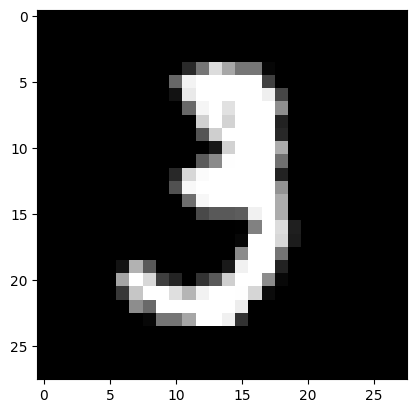

In [6]:
plt.imshow(train_X[10], cmap='gray')
train_y[10]

Changing the y set to categorical, and 10 categories are there

In [7]:
cat_train_y = keras.utils.to_categorical(train_y, num_classes=10)
cat_test_y = keras.utils.to_categorical(test_y,num_classes=10)

In [8]:
cat_train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Creating the Convolution Neural Network Architecture

In [9]:
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

Training with 15 epochs 

In [11]:
model.fit(train_X,cat_train_y,epochs=15,validation_data=(test_X,cat_test_y))

Epoch 1/15
1875/1875 [==============================] - 35s 18ms/step - loss: 1.6389 - accuracy: 0.9112 - val_loss: 0.1257 - val_accuracy: 0.9633
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1521 - accuracy: 0.9559 - val_loss: 0.1145 - val_accuracy: 0.9672
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1280 - accuracy: 0.9625 - val_loss: 0.1075 - val_accuracy: 0.9697
Epoch 4/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1168 - accuracy: 0.9656 - val_loss: 0.1234 - val_accuracy: 0.9659
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1132 - accuracy: 0.9668 - val_loss: 0.1016 - val_accuracy: 0.9698
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0981 - accuracy: 0.9704 - val_loss: 0.1001 - val_accuracy: 0.9753
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0947 - accuracy: 0.9717 - val_loss: 0.1054 -

Seeing the predictions

In [12]:
ypred = model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [13]:
y_label = []
for i in range(len(ypred)):
    y_label.append(np.argmax(ypred[i]))

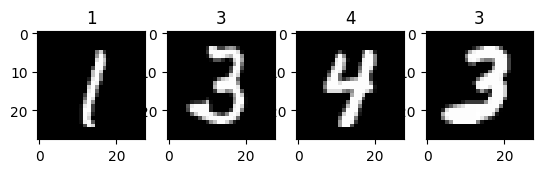

In [14]:
for i in range(4):
    gen = ra.randint(0,len(test_X)-1)
    plt.subplot(1,4,i+1)
    plt.imshow(test_X[gen],cmap='gray')
    plt.title(y_label[gen])

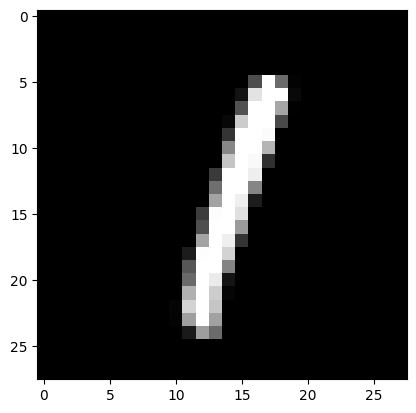

In [37]:
plt.imshow(test_X[5],cmap='gray')

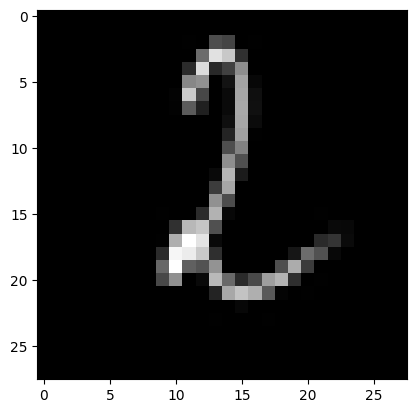

In [88]:
img = Image.open('number2.jpg')
new_img = img.resize((28,28))
bw_img = new_img.convert('L')
bw_img = np.array(bw_img)
bw_img = 255 - bw_img
# bw_img = bw_img/255
# bw_img
# bw_img = 255 - bw_img
plt.imshow(bw_img,cmap='gray')
# plt.title(model.predict(bw_img))

In [89]:
set_img = bw_img.reshape(1,28,28)
ans = model.predict(set_img)

1/1 [==============================] - 0s 21ms/step


2


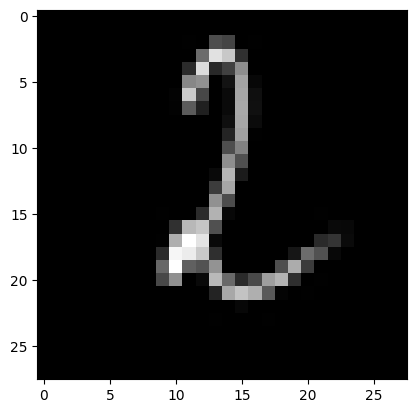

In [90]:
plt.imshow(set_img[0],cmap='gray')
print(np.argmax(ans[0]))